<h1>Advanced Programming with Python Final Exam on Covid data manuplation</h1>

<h3>
By Famba Abdulnassiir Siraji <br> <br>
Reg No: Jan22/Comp/1195u <br> <br>
J22.CS 505 Advanced Programming</h3>

<p> Question <br>
In this lab, you will predict the number of deaths due to covid-19 Pandemic in Americas region. Data set can be downloaded from URL: 

https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide



Where necessary, you will prepare the data set by cleaning and making it in correct format for analysis and visualization.

Use the following methodology with respective performance evaluation metrics such as r-squared, F-1 Scores, correlations, p-values RMSE etc :

1.      Use Pearson Correlations

2.      Descriptive statistics

3.      Simple linear Regression

4.      Multiple Linear Regression

Implementation should be done by python 3.9 or higher using jupyter notebook or IBM Watson Studio.

Which models performs better in the predictions?

Share your codes with the instructor</p>

<h3>Correlation Analysis in Python </h3>

<h3>Import Libralies and data to be used in the analysis</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = './Data/WHO-COVID-19-global-data.csv'
df = pd.read_csv(df)

#Verify if our data is readable .
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [3]:
#print last five records
df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
198838,2022-04-16,ZW,Zimbabwe,AFRO,29,247237,0,5462
198839,2022-04-17,ZW,Zimbabwe,AFRO,24,247261,0,5462
198840,2022-04-18,ZW,Zimbabwe,AFRO,17,247278,1,5463
198841,2022-04-19,ZW,Zimbabwe,AFRO,19,247297,1,5464
198842,2022-04-20,ZW,Zimbabwe,AFRO,39,247336,2,5466


<h4>Scatterplot Graphs and Correlatable Variables </h4>



In [11]:
df_america = df[(df.WHO_region == 'WPRO')]
df_america.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
2517,2020-01-03,AS,American Samoa,WPRO,0,0,0,0
2518,2020-01-04,AS,American Samoa,WPRO,0,0,0,0
2519,2020-01-05,AS,American Samoa,WPRO,0,0,0,0
2520,2020-01-06,AS,American Samoa,WPRO,0,0,0,0
2521,2020-01-07,AS,American Samoa,WPRO,0,0,0,0


In [12]:
americaMeanSmarts = df_america[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(americaMeanSmarts,df_america["MRI_Count"])
plt.show()
%matplotlib inline

KeyError: "None of [Index(['PIQ', 'FSIQ', 'VIQ'], dtype='object')] are in the [columns]"

<h3>Calculating Correlation with Python using pearson Method</h3>

In [5]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,1.988430e+05,1.988430e+05,198843.000000,198843.000000
mean,2.535061e+03,6.055495e+05,31.201274,11582.279250
std,1.671338e+04,3.248202e+06,164.568829,54057.006532
min,-3.295200e+04,0.000000e+00,-2452.000000,0.000000
25%,0.000000e+00,1.840000e+02,0.000000,2.000000
50%,2.500000e+01,1.113500e+04,0.000000,145.000000
75%,5.130000e+02,1.598670e+05,6.000000,2676.500000
max,1.252717e+06,7.994466e+07,11447.000000,981834.000000


In [13]:
df.corr(method='pearson')


,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
New_cases,1.000000,0.576201,0.568410,0.499684
Cumulative_cases,0.576201,1.000000,0.532965,0.913664
New_deaths,0.568410,0.532965,1.000000,0.591891
Cumulative_deaths,0.499684,0.913664,0.591891,1.000000


<h4>Using the same corr() method, it is easy to calculate the correlation of the variables contained in the America-only dataframe <h4>

In [14]:
df_america.corr(method='pearson')

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
New_cases,1.000000,0.677685,0.423350,0.307276
Cumulative_cases,0.677685,1.000000,0.525611,0.718194
New_deaths,0.423350,0.525611,1.000000,0.565211
Cumulative_deaths,0.307276,0.718194,0.565211,1.000000


<h3> Visualise </h3>

In [15]:
!pip install seaborn

     |████████████████████████████████| 292 kB 4.5 MB/s            


<h3>Plot the correlation heatmap </h3>

<AxesSubplot:>

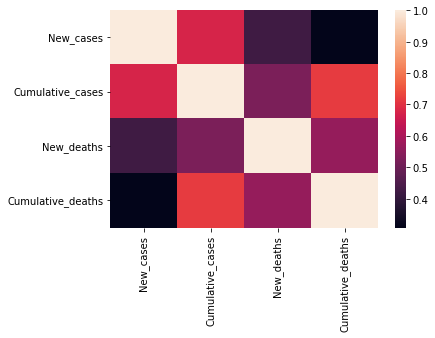

In [16]:
import seaborn as sns

acorr = df_america.corr()
sns.heatmap(acorr)

<h2>Descriptive Statistics</h2>

In [17]:
from scipy import stats

<h3>P-Value </h3>

In [18]:
df_america.corr(method='pearson')

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
New_cases,1.000000,0.677685,0.423350,0.307276
Cumulative_cases,0.677685,1.000000,0.525611,0.718194
New_deaths,0.423350,0.525611,1.000000,0.565211
Cumulative_deaths,0.307276,0.718194,0.565211,1.000000


<h5>Cumulative_deaths vs Cumulative cases
Let's calculate the Pearson Correlation Coefficient and P-value of 'Cumulative_cases' and 'Cumulative_deaths'.</h5>

In [20]:
pearson_coef, p_value = stats.pearsonr(df_america['Cumulative_cases'], df_america['Cumulative_deaths'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.7181944399936874  with a P-value of P = 0.0


<h3>Conclusion</h3>
<p> Since the p-value is < 0.001, the correlation between Cumulative_cases and Cumulative_deaths is statistically significant, although the linear relationship is Positively strong (~0.718) </p>

<h2>Simple linear Regression</h2>

In [21]:
from sklearn.linear_model import LinearRegression 
%matplotlib inline

In [24]:
X = df_america[['Cumulative_cases']] 
Y = df_america['Cumulative_deaths'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
lm.score(X, Y)

0.5158032536378464

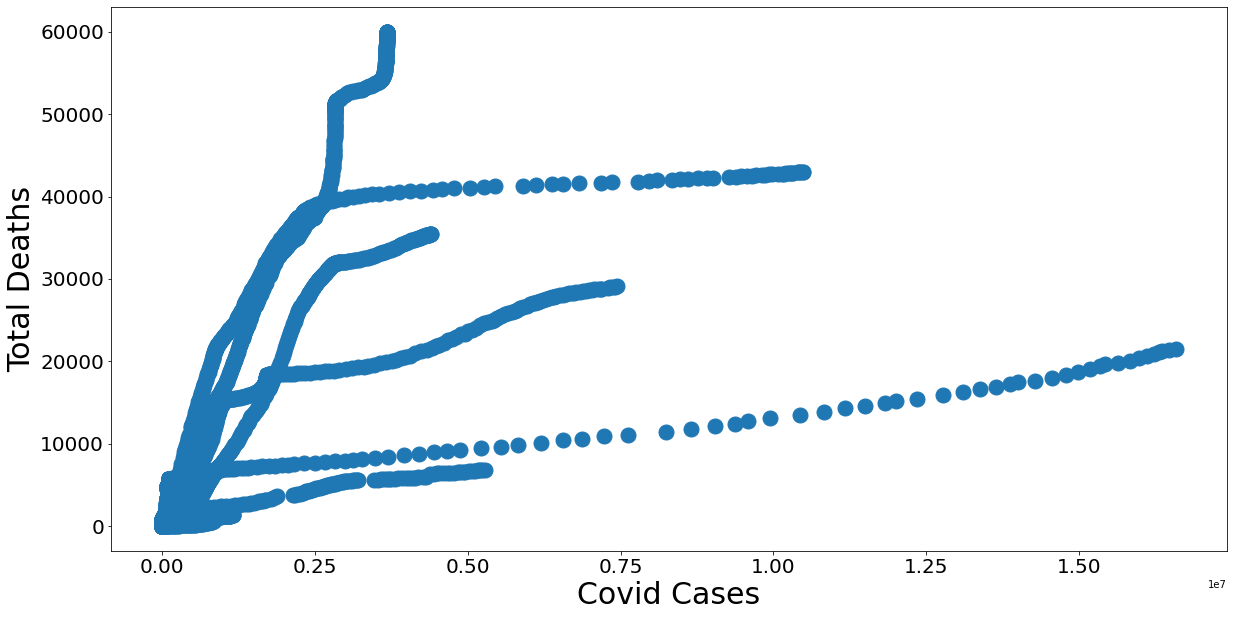

In [28]:

# Display the plot inline
%matplotlib inline

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: Number of stores in the District vs. Annual Net Sales
plt.plot(X,Y, 'o', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Total Deaths', fontsize = 30)
plt.xlabel('Covid Cases', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Display the scatter plot
plt.show()

<h3> Calculate the slope and y-intercept of the linear regression line.</h3>

In [32]:
X = df_america[['Cumulative_cases']] 
Y = df_america['Cumulative_deaths'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
lm.score(X, Y)
Yhat = lm.predict(X)
Yhat[0:5]

array([705.72901142, 705.72901142, 705.72901142, 705.72901142,
       705.72901142])

In [33]:
#intercept Value
print(f'The intercep Value is {lm.intercept_}')

#what is the Slope
print(f'The value of the slope is {lm.coef_} ')

The intercep Value is 705.7290114210747
The value of the slope is [0.00574323] 


(0.0, 111603.0937986058)

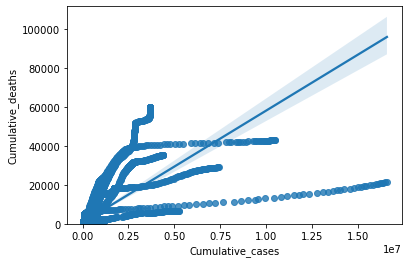

In [34]:
sns.regplot(x="Cumulative_cases", y="Cumulative_deaths", data=df_america)
plt.ylim(0,)

<h3>R-squared</h3>

In [35]:
X = df_america[['Cumulative_cases']] 
Y = df_america['Cumulative_deaths'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
lm.score(X, Y)

0.5158032536378464

<p>~51.5% of the variation of the Death is explained by this simple Linear Model</p>

<h3>MSE</h3>

In [39]:
Yhat =lm.predict(X)
print(Yhat[0:5])

[705.72901142 705.72901142 705.72901142 705.72901142 705.72901142]


In [42]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_america['Cumulative_deaths'],Yhat)
print(f'The Mean square error of Deaths - cumulative total and Preicted value is {mse}')

The Mean square error of Deaths - cumulative total and Preicted value is 20346151.989108205


<h2>Multiple Linear Regression</h2>

In [46]:
Z = df_america[['Cumulative_cases','New_cases','New_deaths']]

#fit it in a model
lm.fit(Z, df_america['Cumulative_deaths'])

LinearRegression()

In [47]:
#intercept Value
print(f'The intercep Value is {lm.intercept_}')

#what is the Slope
print(f'The value of the slope is {lm.coef_} ')

The intercep Value is 447.582078675435
The value of the slope is [ 6.50520880e-03 -1.55848740e-01  5.39983768e+01] 


<h2>R-Squared</h2>

In [48]:
# fit the model 
lm.fit(Z, df_america['Cumulative_deaths'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df_america['Cumulative_deaths']))

The R-square is:  0.6369906202668025


<h2>Let's calculate the MSE for Multiple linear Regression</h2>

In [49]:
Y_predict_multifit = lm.predict(Z)

In [50]:
print('The mean square error of Total death and predicted value using multifit is: ', \
      mean_squared_error(df_america['Cumulative_deaths'], Y_predict_multifit))

The mean square error of Total death and predicted value using multifit is:  15253807.608197575


<h2>Conclusion</h2>

<p>Comparing these four models, we conclude that the Multiple Linear Regression model is the best model to be able to predict Deaths from our dataset. This result makes sense, since we have 3 variables in total, and we know that more than one of those variables are potential predictors of the final numbers of Deaths.</p>